Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.7326 - loss: 0.7313
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8808 - loss: 0.3290
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8974 - loss: 0.2807
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9138 - loss: 0.2339
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9214 - loss: 0.2113
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9277 - loss: 0.1945
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9373 - loss: 0.1696
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9426 - loss: 0.1553
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9505 - loss: 0.1342
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9563 - loss: 0.1172
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9075 - loss: 0.2944
Test accuracy: 0.9101999998092651


KeyError: 'val_accuracy'

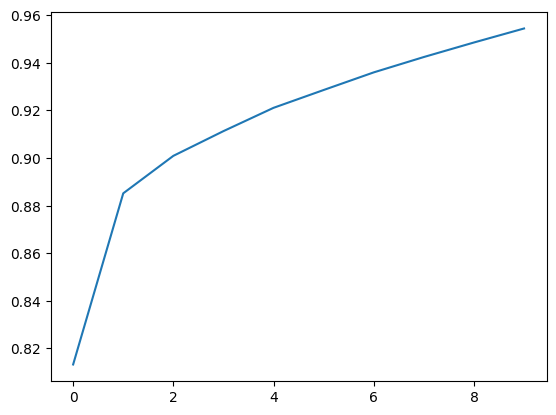

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))/ 255
test_images = test_images.reshape((10000, 28, 28, 1))/ 255

class TheModel(tf.keras.Model):
    def __init__(self):
        super(TheModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation="relu")
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3), activation="relu")
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.conv3 = layers.Conv2D(128, (3, 3), activation="relu")
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(128, activation="relu")
        self.output_layer = layers.Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.output_layer(x)

model = TheModel()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()